# <font color='blue'> Housing Dataset </font>
###  The objective of this notebook is to check and deal with missing values of this Housing dataset and trying different solutions and techniques .


####  presented by : 
#  <font color='red'> Mohamed Anwar </font> 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import missingno as msno
os.chdir('C:\\Users\\Anwar\\Desktop') 


In [2]:
df = pd.read_csv("housing.csv" , sep = "," , encoding = 'utf-8')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100,INLAND,female
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100,INLAND,male
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300,INLAND,female
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700,INLAND,male


In [3]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
5,-122.25,37.85,NaN,919,213.0,NaN,193,4.0368,269700,NEAR BAY,female
6,-122.25,37.84,NaN,2535,NaN,NaN,514,3.6591,299200,NEAR BAY,male
7,-122.25,37.84,NaN,3104,NaN,NaN,NaN,3.1200,241400,NEAR BAY,female
8,-122.26,37.84,42.0,2555,NaN,NaN,NaN,2.0804,226700,NEAR BAY,male
9,-122.25,37.84,52.0,3549,NaN,NaN,NaN,3.6912,261100,NEAR BAY,female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


## Checking if we have null values

In [5]:
df.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

In [6]:
df.isnull().sum()/df.shape[0]*100

longitude              0.000000
latitude               0.000000
housing_median_age     1.250000
total_rooms            0.000000
total_bedrooms        23.653101
population             0.213178
households             6.322674
median_income         13.406008
median_house_value     0.000000
ocean_proximity        0.000000
gender                19.476744
dtype: float64

### Population and housing_median_income columns has very low percentage of null values , hence , they can be dropped 

#### there is 258 null values in housing_median_age column , 4882 in total_bedrooms , 44 in population  , 1305 in households ,2767 in median income and 4020 in gender column .

In [7]:
df.sample(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
13070,-121.31,38.58,10.0,2421,580.0,962.0,497,NaN,112500,INLAND,male
15649,-122.41,37.79,52.0,2161,544.0,904.0,431,3.5066,350000,NEAR BAY,female
17805,-121.87,37.38,16.0,1050,245.0,722.0,228,4.5187,163500,<1H OCEAN,female
12630,-121.50,38.49,29.0,3606,690.0,2317.0,696,NaN,78200,INLAND,male
5100,-118.31,33.97,52.0,1629,277.0,819.0,288,3.7250,142600,<1H OCEAN,male
16010,-122.46,37.74,52.0,2180,326.0,856.0,326,5.3961,416900,NEAR BAY,female
17578,-121.94,37.30,26.0,4348,814.0,2347.0,810,4.7275,293000,<1H OCEAN,male
3146,-118.51,35.16,7.0,4371,727.0,1932.0,654,4.6250,136800,INLAND,male
17516,-121.93,37.33,44.0,2142,358.0,846.0,375,5.4273,421000,<1H OCEAN,male
4012,-118.60,34.16,37.0,3441,584.0,1283.0,544,4.1656,313100,<1H OCEAN,male


### in the household column , the observation "no " indicates a null value , but the libraries won't interpret it so we will convert it to NaN

In [8]:

df['households'].value_counts()

no      3080
282       47
375       46
380       45
306       45
        ... 
1649       1
1879       1
1050       1
1119       1
1843       1
Name: households, Length: 1703, dtype: int64

In [9]:
df['households'] = df['households'].replace('no', pd.NA)
df['households'].value_counts()

282     47
375     46
380     45
306     45
239     42
        ..
1342     1
1493     1
1808     1
1967     1
1843     1
Name: households, Length: 1702, dtype: int64

In [10]:
df.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            4385
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

#### now we have 4385 null values in the column households 

 ## Converting households colum type into numeric 

In [11]:
df['households'] = pd.to_numeric(df['households'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          16255 non-null  float64
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB


## Visualizing Null Values

<AxesSubplot:>

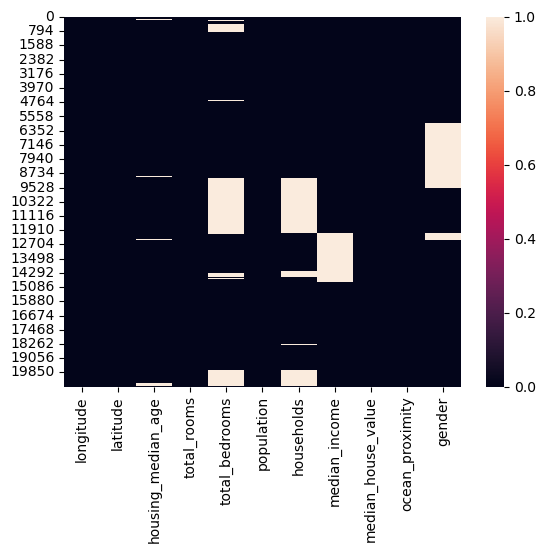

In [12]:
sns.heatmap(df.isnull())

<AxesSubplot:>

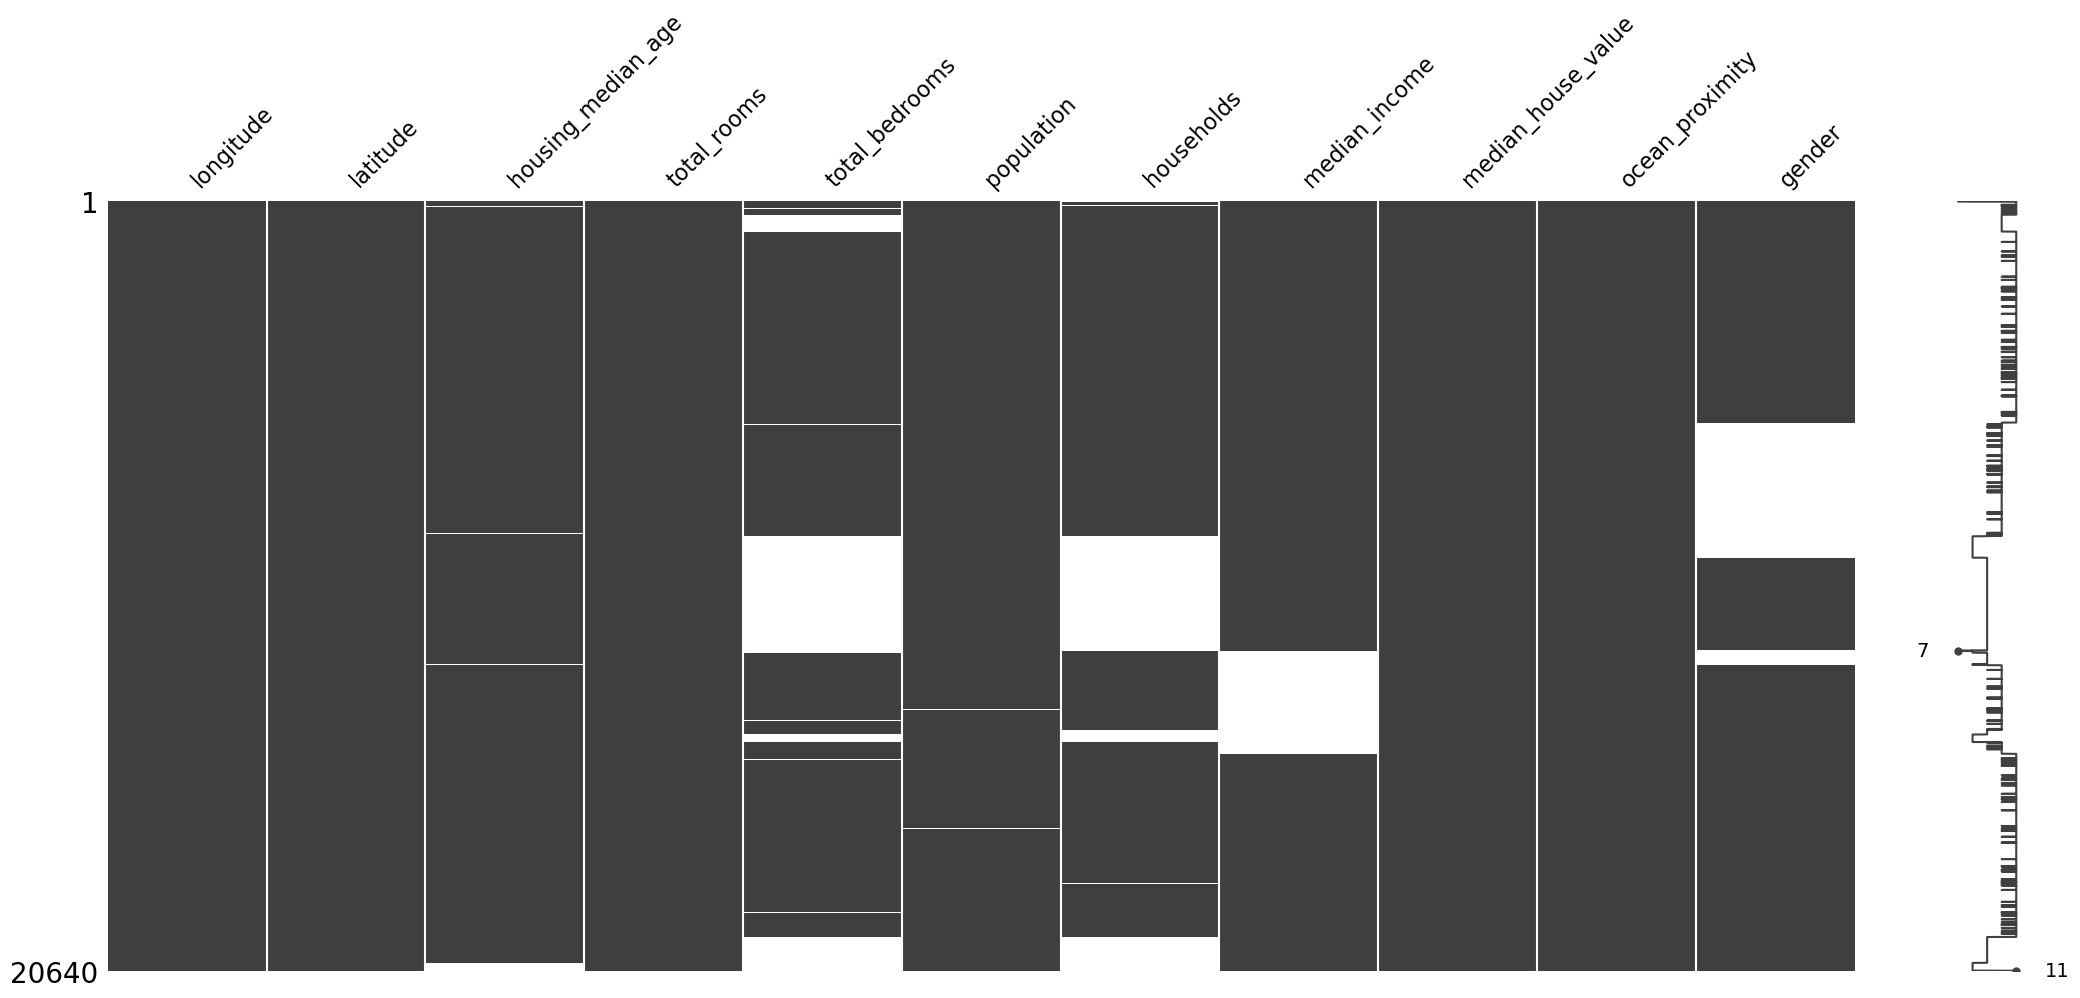

In [13]:
import missingno  as msno
msno.matrix(df)


# Dealing with Missing values in various ways 

## 1) Deleting "Dropping" rows that contain missing values

#### We will use this method with columns that has a little number of null values , like Population

In [14]:
x=df.copy()

In [15]:
x.dropna(subset=['population'],inplace=True)
x.isnull().sum()

longitude                0
latitude                 0
housing_median_age     254
total_rooms              0
total_bedrooms        4875
population               0
households            4379
median_income         2761
median_house_value       0
ocean_proximity          0
gender                4007
dtype: int64

## 2) Filling missing values with Fillna() using mean , median or mode .

In [16]:
x['median_income'].mean()

3.939068595458402

In [17]:
median_income_median=x['median_income'].median()
x['median_income'] = x['median_income'].fillna(median_income_median)
x.isnull().sum()

longitude                0
latitude                 0
housing_median_age     254
total_rooms              0
total_bedrooms        4875
population               0
households            4379
median_income            0
median_house_value       0
ocean_proximity          0
gender                4007
dtype: int64

In [18]:
x['median_income'].mean()

3.8918049572729774

#### the overall mean of this column after filling null values with median is almost equal to the mean before filling

## 3) Filling missing values using fFill() , This method fills each missing row with the value of the nearest one above it.

In [19]:
x.isnull().sum()


longitude                0
latitude                 0
housing_median_age     254
total_rooms              0
total_bedrooms        4875
population               0
households            4379
median_income            0
median_house_value       0
ocean_proximity          0
gender                4007
dtype: int64

In [20]:
x['housing_median_age'].mean()

28.667731786451675

In [21]:
x['housing_median_age'] = x['housing_median_age'].fillna(method= "ffill")
x.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        4875
population               0
households            4379
median_income            0
median_house_value       0
ocean_proximity          0
gender                4007
dtype: int64

In [22]:
x['housing_median_age'].mean()

28.612983103515244

#### the mean value of this column hasn't changed very much .

## 4) filling missing values using Mean

In [23]:
x['total_bedrooms'].mean()

539.6535843775841

In [24]:
bedrooms_mean = x['total_bedrooms'].mean()
x['total_bedrooms'] = x['total_bedrooms'].fillna(bedrooms_mean)
x.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms           0
population               0
households            4379
median_income            0
median_house_value       0
ocean_proximity          0
gender                4007
dtype: int64

In [25]:
x['total_bedrooms'].mean()

539.6535843776375

#### filling total_bedrooms column with mean , gives an overall mean that's almost equal to the mean with the presence of null value

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20596 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20596 non-null  float64
 1   latitude            20596 non-null  float64
 2   housing_median_age  20596 non-null  float64
 3   total_rooms         20596 non-null  int64  
 4   total_bedrooms      20596 non-null  float64
 5   population          20596 non-null  float64
 6   households          16217 non-null  float64
 7   median_income       20596 non-null  float64
 8   median_house_value  20596 non-null  int64  
 9   ocean_proximity     20596 non-null  object 
 10  gender              16589 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.9+ MB


In [27]:
x.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms           0
population               0
households            4379
median_income            0
median_house_value       0
ocean_proximity          0
gender                4007
dtype: int64

## 5) Filling missing values using bfill() , This method fills each missing row with the value of the nearest one below it.

In [28]:
x['households'].mean()

500.5084170931738

In [29]:
x['households'] = x['households'].fillna(method= "ffill")
x.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms           0
population               0
households               0
median_income            0
median_house_value       0
ocean_proximity          0
gender                4007
dtype: int64

In [30]:
x['households'].mean()

469.0691396387648

## 6) Filling missing values randomly from a list of given values

C:\Users\Anwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

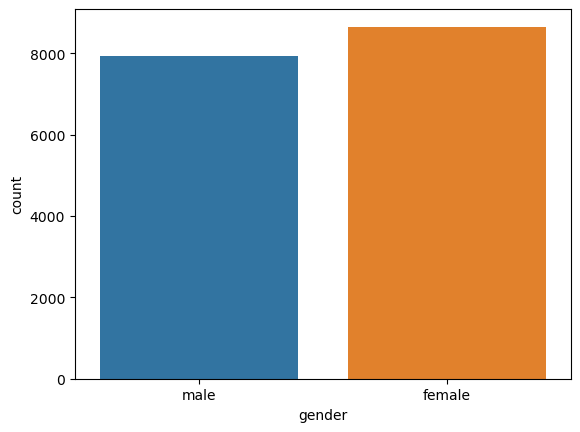

In [31]:
sns.countplot(x['gender'])

In [32]:
filling_list = ['female' , 'male']
x['gender'] = x['gender'].fillna(pd.Series(np.random.choice(filling_list , size = len(df.index))))

In [33]:
x.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
gender                0
dtype: int64

C:\Users\Anwar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

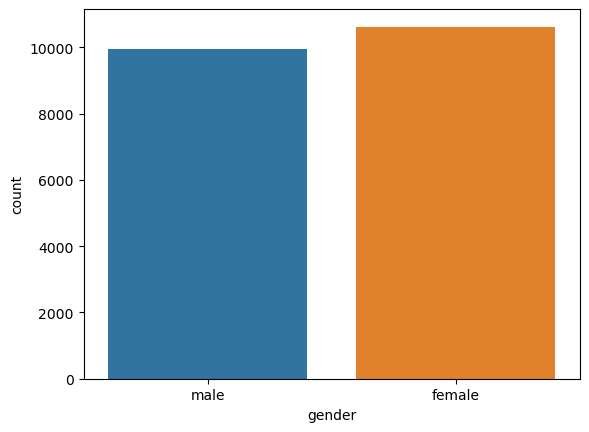

In [34]:
sns.countplot(x['gender'])

## 7) Using interpolate to deal with missing values

In [35]:
z=df.copy()
z.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            4385
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

In [36]:
z['median_income'].mean()

3.9394028646562207

In [37]:
z['median_income'] = z['median_income'].interpolate()

In [38]:
z['median_income'].mean()

3.6979133599806597

### 8) Replacing the null values with the mode


In [39]:
z.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            4385
median_income            0
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

In [40]:
z['housing_median_age'].mean()

28.676282994799333

In [41]:
z['housing_median_age'].replace([np.nan], z['housing_median_age'].mode(), inplace=True)


In [42]:
z['housing_median_age'].mean()

28.967829457364342

In [43]:
z.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        4882
population              44
households            4385
median_income            0
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

## We can fill the null values in the households column randomly from a given list of the top most 4 occurances

In [44]:
house=df.copy()
house.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            4385
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

In [45]:
filling_list = [282.0,375.0,380.0,239.0]
house['households'] = house['households'].fillna(pd.Series(np.random.choice(filling_list , size = len(df.index))))

In [46]:
house.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households               0
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

##  9) Random Sample Imputation  

## 10) Multiple Imputation

<AxesSubplot:>

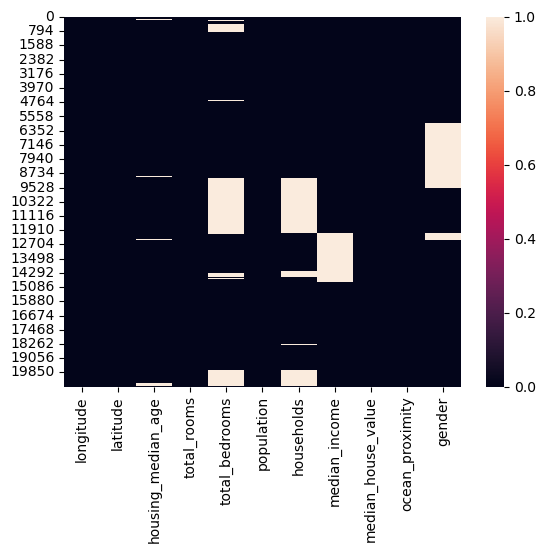

In [47]:
sns.heatmap( df.isnull())


## Filling with a dictonairy

In [48]:
x= df.copy()
x.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            4385
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

In [49]:
dict_fill={"housing_median_age":x['housing_median_age'].mean(),
          "total_bedrooms":x['total_bedrooms'].median()}
dict_fill

{'housing_median_age': 28.676282994799333, 'total_bedrooms': 435.0}

In [50]:
x.fillna(dict_fill,inplace=True)

In [51]:
x.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms           0
population              44
households            4385
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

### Using Fillng List for total bedrooms

C:\Users\Anwar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bedrooms', ylabel='Density'>

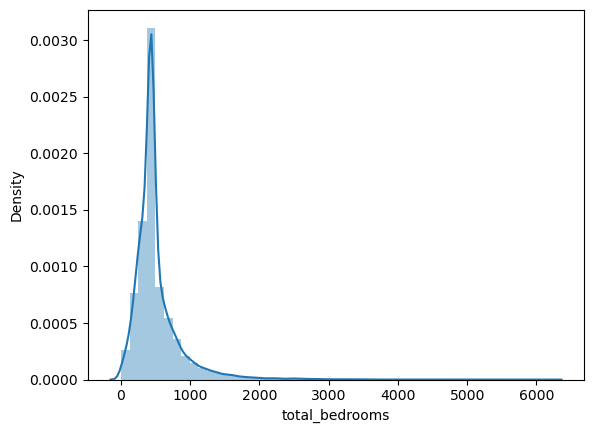

In [52]:
sns.distplot(x['total_bedrooms'])


In [53]:
x=df.copy()
fill_list = x['total_bedrooms'].dropna()## because the series keeps Na so in this we delete it
x['total_bedrooms'] = x['total_bedrooms'].fillna(pd.Series(np.random.choice(fill_list , size = len(x.index))))

C:\Users\Anwar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bedrooms', ylabel='Density'>

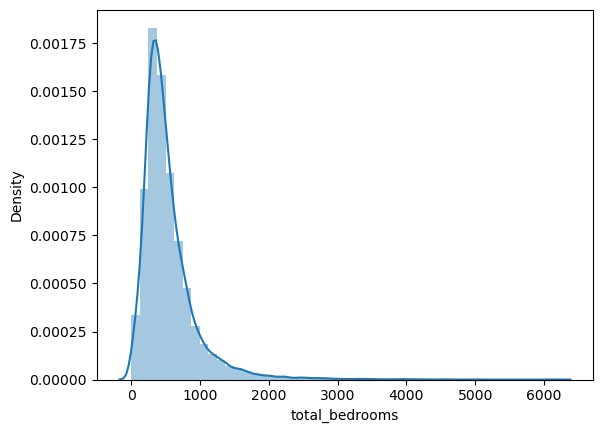

In [54]:
sns.distplot(x['total_bedrooms'])


### it gives almost the same distribution

# 
ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# Conclusion
#### Missing data is a problem everyone faces while dealing with real-life data. It can impact the quality and accuracy of our results. Understanding the different types of missing data values and their potential impact on the analysis is crucial for researchers to select an appropriate method for handling the missing data. Each method has its advantages and disadvantages and is appropriate for different types of missing data values, we discussed in this notebook some techniques for dealing with missing values such as dropping them , filling missing values with mode , mean or median , using methods like bfill and ffill , using interpolate , there are some other techniques like Random Sample Imputation and Multile Imputation , the choice of Technique depends on the nature of your dataset , why the values are missing and the percentage of missing values , there is no straightforward solution for this problem .
